In [1]:
import xarray as xr
import datetime
import pymannkendall as mk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from dask.diagnostics import ProgressBar
import pymannkendall as mk

In [2]:
# I can compare to MODIS data MODIS LST max ! -> MODIS terra

In [3]:
# read per year and then concact!
lst_2007 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2007/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [4]:
# read per year and then concact!
lst_2008 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2008/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [5]:
lst_2009 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2009/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [6]:
lst_2010 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2010/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [7]:
lst_2011 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2011/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [8]:
lst_2012 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2012/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [9]:
lst_2013 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2013/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [10]:
lst_2014 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2014/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [11]:
lst_2015 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2015/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [12]:
lst_2016 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2016/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [13]:
lst_2017 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2017/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [14]:
lst_2018 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2018/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [15]:
lst_2019 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2019/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [16]:
lst_2020 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2020/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [17]:
lst_2021 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2021/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [18]:
lst_2022 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2022/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [19]:
lst_2023 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2023/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [20]:
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [21]:
lc_interp = lc.interp(lat=lst_2023.coords['lat'], lon=lst_2023.coords['lon'], method='nearest')

In [22]:
# load the time series somewhere ?
# try as monthly max

results = {}

for year in range(2007, 2024):

    ds = globals()[f"lst_{year}"]   # load lst_1981, lst_1982, ...

    # 2. Fixed 10-day bins anchored at Jan 1 every year
    
    ds = ds.where(lc_interp['lccs_class'] != 210)
    print(ds)
    clean_LST = ds['LST'].where(ds['LST'] != 110, np.nan)
    max_mon = (
        clean_LST
        .resample(
            time='1MS'
        )
        .max()
    )

    # Ensure bins exist even with no data
    # Xarray automatically creates them and fills with NaN

    results[year] = max_mon

<xarray.Dataset>
Dimensions:      (lat: 800, lon: 7200, time: 213)
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2007-06-02 2007-06-03 ... 2007-12-31
Data variables:
    LST          (lat, lon, time) float32 dask.array<chunksize=(800, 7200, 1), meta=np.ndarray>
    satzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    sunzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    scan_time    (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    test_mae     (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    r2           (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
<xarray.Dataset>
Dimensions:      (lat: 800,

In [23]:
combined = xr.concat([results[y] for y in range(2007, 2024)], dim="time")

In [24]:
combined

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 199)>
dask.array<concatenate, shape=(800, 7200, 199), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2007-06-01 2007-07-01 ... 2023-12-01

In [26]:
import pandas as pd

new_time = combined.time.to_index() + pd.DateOffset(months=1)

combined = combined.assign_coords(time=new_time)


In [31]:
combined

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 199)>
dask.array<concatenate, shape=(800, 7200, 199), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2007-07-01 2007-08-01 ... 2024-01-01

In [36]:
jf_max = (
    combined
    .where(combined.time.dt.month.isin([1, 2]), drop=True)
    .groupby("time.year")
    .max("time")
)


In [37]:
jf_max

<xarray.DataArray 'LST' (lat: 800, lon: 7200, year: 17)>
dask.array<transpose, shape=(800, 7200, 17), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * year         (year) int64 2008 2009 2010 2011 2012 ... 2021 2022 2023 2024

In [40]:
ja_max = (
    combined
    .where(combined.time.dt.month.isin([7, 8]), drop=True)
    .groupby("time.year")
    .max("time")
)


In [41]:
ja_max

<xarray.DataArray 'LST' (lat: 800, lon: 7200, year: 17)>
dask.array<transpose, shape=(800, 7200, 17), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * year         (year) int64 2007 2008 2009 2010 2011 ... 2020 2021 2022 2023

In [43]:
clim_jf = jf_max.mean("year")
anom_jf = jf_max - clim_jf


In [44]:
clim_ja = ja_max.mean("year")
anom_ja = ja_max - clim_ja

In [45]:
anom_ja

<xarray.DataArray 'LST' (lat: 800, lon: 7200, year: 17)>
dask.array<sub, shape=(800, 7200, 17), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * year         (year) int64 2007 2008 2009 2010 2011 ... 2020 2021 2022 2023

In [47]:
anoms = anom_ja.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(year=-1))   # <<< REQUIRED

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/dask/array/reductions.py:649: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


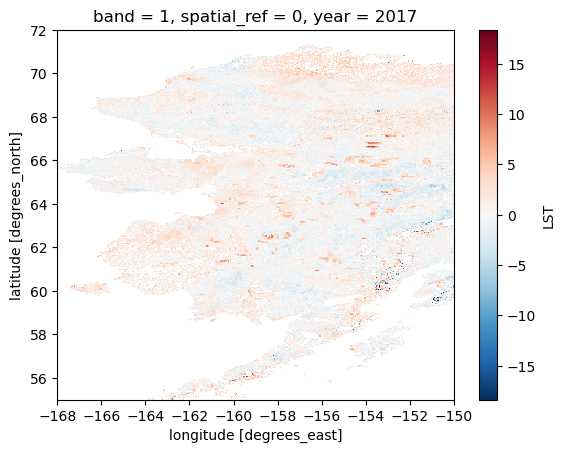

In [49]:
anoms.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(year=10).plot();

In [52]:
def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope

In [56]:
anoms

<xarray.DataArray 'LST' (lat: 340, lon: 360, year: 17)>
dask.array<rechunk-merge, shape=(340, 360, 17), dtype=float32, chunksize=(340, 360, 17), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 55.03 55.08 55.12 55.17 ... 71.88 71.93 71.97
  * lon          (lon) float32 -168.0 -167.9 -167.9 ... -150.1 -150.1 -150.0
    band         int64 1
    spatial_ref  int64 0
  * year         (year) int64 2007 2008 2009 2010 2011 ... 2020 2021 2022 2023

In [54]:
anoms.year.values

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023])

In [57]:
slope = xr.apply_ufunc(
    theil_sen_1d,
    anoms,
    anoms.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade = slope * 1

In [58]:
with ProgressBar():
    res = trend_per_decade.compute()

[########################################] | 100% Completed | 161.42 s


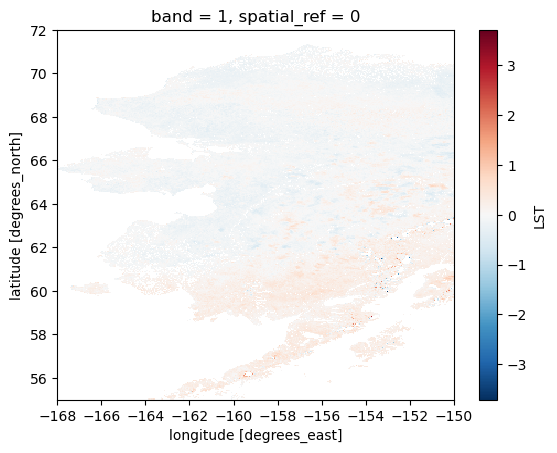

In [65]:
res.plot();

In [59]:
def mk_pvalue(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).p

In [61]:
mk_p = xr.apply_ufunc(
    mk_pvalue,
    anoms,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [62]:
with ProgressBar():
    p_val = mk_p.compute()

[########################################] | 100% Completed | 206.77 s


In [82]:
significant_trend = res.where(p_val < 0.1)

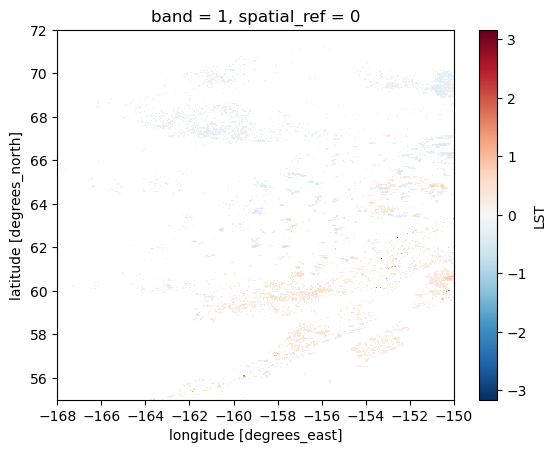

In [83]:
significant_trend.plot();

In [66]:
## Winter
anoms_jf = anom_jf.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms_jf = anoms_jf.chunk(dict(year=-1))   # <<< REQUIRED

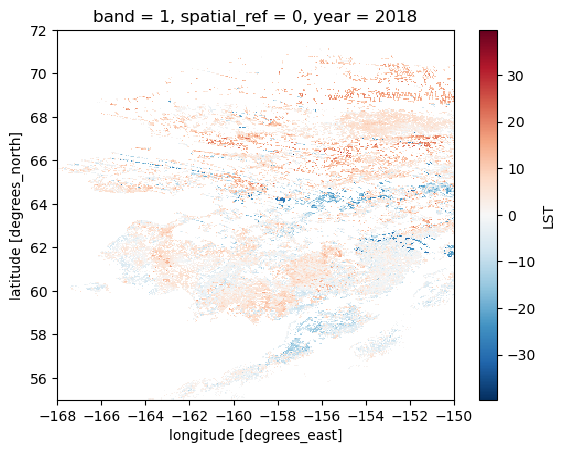

In [68]:
anoms_jf.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(year=10).plot();

In [70]:
slope_jf = xr.apply_ufunc(
    theil_sen_1d,
    anoms_jf,
    anoms_jf.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade_jf = slope_jf * 1

In [71]:
with ProgressBar():
    res_jf = trend_per_decade_jf.compute()

[########################################] | 100% Completed | 132.29 s


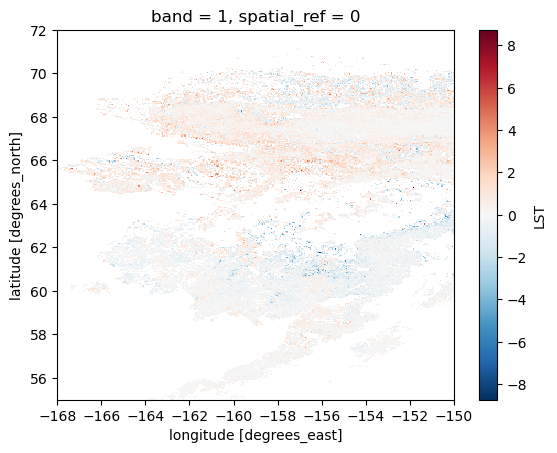

In [72]:
res_jf.plot();

In [74]:
mk_p_jf = xr.apply_ufunc(
    mk_pvalue,
    anoms_jf,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [75]:
with ProgressBar():
    p_val_jf = mk_p_jf.compute()

[########################################] | 100% Completed | 152.82 s


In [78]:
significant_trend_jf = res_jf.where(p_val_jf < 0.1)

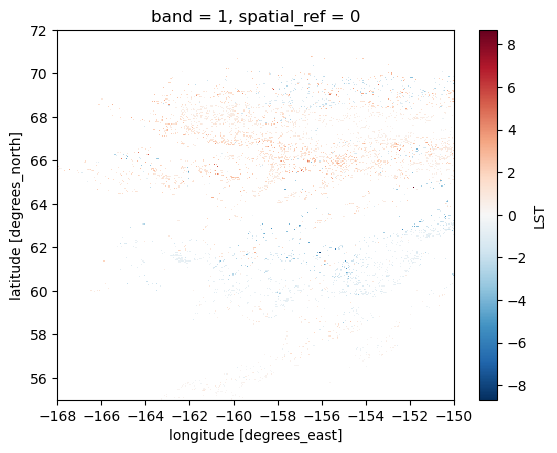

In [79]:
significant_trend_jf.plot();

In [84]:
significant_trend_jf.to_netcdf('significant_trends_metop_2007_2023_jf.nc')

In [85]:
significant_trend.to_netcdf('significant_trends_metop_2007_2023_ja.nc')